In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mydir = "../final"
allinfoFiles = [x for x in os.listdir(mydir) if "filtered" in x]
f = lambda x: mydir + "/" + x
allinfoFiles = [x for x in map(f, allinfoFiles)]
allinfoFiles

['../final/test-run32-B_S58_L001.assembled-AGTCAGTC-IGH_HUMAN-allinfo-filtered.csv']

In [3]:
def makeDfSubClone(df, cols):
    df_sub = df.groupby(by=cols).agg({'acc': pd.Series.nunique})
    df_sub = df_sub.sort_values(by='acc', ascending=False)
    df_sub = df_sub.reset_index()
    df_sub = df_sub.rename(columns={'acc': 'freq'})
    return(df_sub)
#df_test = makeDfSubClone(df, ['cdr3pep'])
#df_test.head()

In [4]:
def subCloneStats(df_stats, df, sample, clonedef):
    df_stats = df_stats.append(pd.DataFrame({'Sample': sample, 'Subclone definition': clonedef, 'Description': "uniq subclones", 'Value': len(df)}, index=[0]), ignore_index = True)
    df_stats = df_stats.append(pd.DataFrame({'Sample': sample, 'Subclone definition': clonedef, 'Description': "freq top subclone", 'Value': df['freq'][0]}, index=[0]), ignore_index=True)
    df_stats = df_stats.append(pd.DataFrame({'Sample': sample, 'Subclone definition': clonedef, 'Description': "freq top10 subclones", 'Value': df['freq'].head(10).sum()}, index=[0]), ignore_index=True)
    df_stats = df_stats.append(pd.DataFrame({'Sample': sample, 'Subclone definition': clonedef, 'Description': "total freq", 'Value': df['freq'].sum()}, index=[0]), ignore_index=True)
    return(df_stats)

In [5]:
df_stats = pd.DataFrame({'Sample': list(), 'Subclone definition': list(), 'Description': list(), 'Value': list()})
for allinfoFile in allinfoFiles:
    list_df = list()
    list_df_names = list()
    df = pd.read_csv(allinfoFile, sep="\t")

    df_CDR3_pep_short = makeDfSubClone(df, ['cdr3pepshort'])
    list_df.append(df_CDR3_pep_short)
    list_df_names.append("df_CDR3_pep_short")
    
    df_CDR3_pep_long = makeDfSubClone(df, ['cdr3pep'])
    list_df.append(df_CDR3_pep_long)
    list_df_names.append("df_CDR3_pep_long")
    
    df_CDR3_nuc_short = makeDfSubClone(df, ['cdr3nucshort'])
    list_df.append(df_CDR3_nuc_short)
    list_df_names.append("df_CDR3_nuc_short")
    
    df_CDR3_nuc_long = makeDfSubClone(df, ['cdr3nuc'])
    list_df.append(df_CDR3_nuc_long)
    list_df_names.append("df_CDR3_nuc_long")
    
    df_VCDR3_pep_short = makeDfSubClone(df, ['V_sub', 'cdr3pepshort'])
    list_df.append(df_VCDR3_pep_short)
    list_df_names.append("df_VCDR3_pep_short")
    
    df_VCDR3_pep_long = makeDfSubClone(df, ['V_sub', 'cdr3pep'])
    list_df.append(df_VCDR3_pep_long)
    list_df_names.append("df_VCDR3_pep_long")
    
    df_VCDR3_nuc_short = makeDfSubClone(df, ['V_sub', 'cdr3nucshort'])
    list_df.append(df_VCDR3_nuc_short)
    list_df_names.append("df_VCDR3_nuc_short")
    
    df_VCDR3_nuc_long = makeDfSubClone(df, ['V_sub', 'cdr3nuc'])
    list_df.append(df_VCDR3_nuc_long)
    list_df_names.append("df_VCDR3_nuc_long")
    
    df_VJCDR3_pep_short = makeDfSubClone(df, ['V_sub', 'J_sub', 'cdr3pepshort'])
    list_df.append(df_VJCDR3_pep_short)
    list_df_names.append("df_VJCDR3_pep_short")
    
    df_VJCDR3_pep_long = makeDfSubClone(df, ['V_sub', 'J_sub', 'cdr3pep'])
    list_df.append(df_VJCDR3_pep_long)
    list_df_names.append("df_VJCDR3_pep_long")
    
    df_VJCDR3_nuc_short = makeDfSubClone(df, ['V_sub', 'J_sub', 'cdr3nucshort'])
    list_df.append(df_VJCDR3_nuc_short)
    list_df_names.append("df_VJCDR3_nuc_short")
    
    df_VJCDR3_nuc_long = makeDfSubClone(df, ['V_sub', 'J_sub', 'cdr3nuc'])
    list_df.append(df_VJCDR3_nuc_long)
    list_df_names.append("df_VJCDR3_nuc_long")
    
    for i in range(len(list_df)):
        df_stats = subCloneStats(df_stats, list_df[i], allinfoFile.split("/")[-1].split("_L001")[0], list_df_names[i])

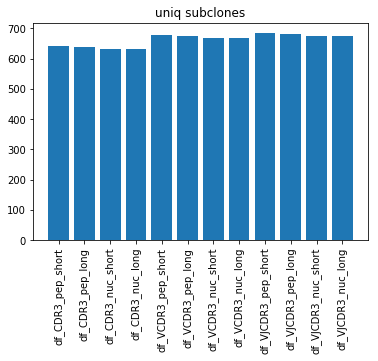

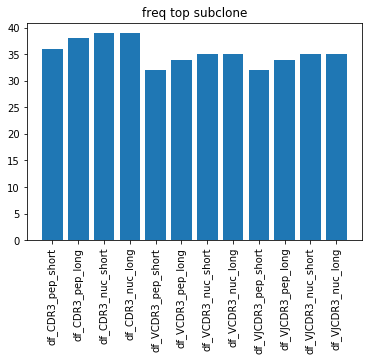

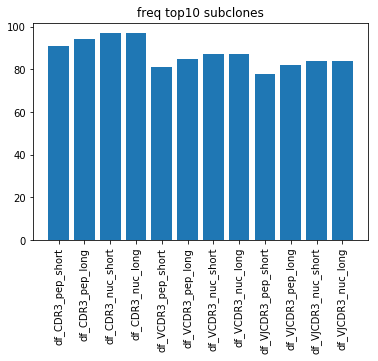

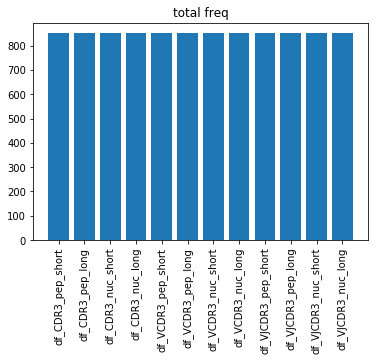

In [6]:
for descr in list(df_stats['Description'].unique()):
    df_tmp = df_stats[df_stats['Description'] == descr]
    plt.bar(df_tmp['Subclone definition'], df_tmp['Value'])
    plt.xticks(df_tmp['Subclone definition'], rotation='vertical')
    plt.title(descr)
    plt.show()